<a href="https://colab.research.google.com/github/SamanvayMS/FIN-554-Algo-trading-finalproject/blob/main/VWAP_hypothesis_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
pip install update pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [51]:
yf.pdr_override()

In [52]:
start='2000-01-01'
end='2010-01-01'
df = yf.download('SPY',start,end)

[*********************100%***********************]  1 of 1 completed


In [53]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [54]:
def data_prep_VWAP(symbol,lookback,start,end):
  # Calculate the cumulative sum of price times volume
  df = yf.download(symbol,start,end)
  df['PV'] = df['Close'] * df['Volume']
  df['CumulativePV'] = df['PV'].rolling(lookback).sum()

  # Calculate the cumulative sum of volume
  df['CumulativeVolume'] = df['Volume'].rolling(lookback).sum()

  # Calculate the rolling VWAP
  df['RollingVWAP'] = df['CumulativePV'] / df['CumulativeVolume']
  df['signal']=np.where(df['Open']>df['RollingVWAP'].shift(1),1,0)
  df['returns']=(df['Close']-df['Open'])/df['Open']
  df['shifted_returns']=df['returns'].shift(-1)
  df['direction'] = [1 if x>0 else 0 for x in df['returns']]
  df=df.dropna(axis=0)
  return df

In [55]:
# here we look at stcoks from all the sectors of the market
sectors = ['Tech','Healthcare','Financial','Consumer_D','Consumer_S','Industrial','Energy','Utility','Market_ETF']
Tech_stocks=['AAPL','MSFT','NVDA','ADBE','CRM','GOOGL','AMZN','IBM','INTC','CSCO']
Healthcare_stocks=['JNJ','PFE','MRK','GILD','AMGN','BMY','LLY','REGN','UNH']
Financial_stocks=["JPM", "BAC", "WFC", "C", "GS", "MS", "V", "MA", "AXP", "SCHW"]
Consumer_D_stocks = ["HD", "MCD", "NKE", "SBUX", "DIS", "CMCSA", "LOW", "GM", "F", "BKNG"] # Consumer discretionary
Consumer_S_stocks= ["PG", "KO", "PEP", "WMT", "CL", "KMB", "CLX", "MDLZ", "EL"] #Consumer Staples
Industrial_stocks = ["BA", "GE", "MMM", "HON", "CAT", "RTX", "LMT", "GD", "UNP", "FDX"]
Energy_stocks = ["XOM", "CVX", "BP", "COP", "EOG", "OXY", "SLB", "KMI", "WMB"]
Utility_stocks = ["NEE", "DUK", "D", "SO", "EXC", "AEP", "SRE", "XEL", "WEC", "AWK"]
Market_ETF_stocks = ['SPY','QQQ']

### Asset selection for tests
selected a bunch of stocks from each sector for running and analysing the stocks and their sector wise dependence.
pros- can identify the sector wise dependence of stocks on indicators 
cons - 
survivorship bias as some stocks might delisted or just added 
overfitting bias as we are cherry picking stocks based on p value 


In [56]:
lookbacks=[9,20,50,100,200]

In [57]:
start='2000-01-01'
end='2015-01-01'

# Hypothesis Tests 


chi_squared test

In [58]:
from scipy.stats import chi2_contingency

H0 :- null hypothesis assumes no significant relationship between opening price and the previous rolling VWAP value

H1 :- significant relationship with the previous VWAP value bullish when above VWAP and bearish when below VWAP

In [59]:
def chi_2(Symbol,lookback,start,end):
  df = data_prep_VWAP(Symbol,lookback,start=start,end=end)
  observed=pd.crosstab(df['direction'],df['signal'])
  result = chi2_contingency(observed)
  print(f"p value for {Symbol} is {result[1]}")
  if result[1]>0.01:
    print("null hypothesis cannot be rejected")
  else:
    print("null hypothesis is rejected")
  return result[1]

In [60]:
chi_2_hypothesis_rejected=dict.fromkeys(sectors)
for sector in sectors:
  chi_2_hypothesis_rejected[sector]={}
  for stock in eval(sector+'_stocks'):
    chi_2_hypothesis_rejected[sector][stock]={}
    for lookback in lookbacks:
      p_value = chi_2(stock,lookback,start,end)
      if p_value<0.01:
        chi_2_hypothesis_rejected[sector][stock][lookback]=p_value


[*********************100%***********************]  1 of 1 completed
p value for AAPL is 0.6721138252519054
null hypothesis cannot be rejected
[*********************100%***********************]  1 of 1 completed
p value for AAPL is 0.3827554663007662
null hypothesis cannot be rejected
[*********************100%***********************]  1 of 1 completed
p value for AAPL is 0.494727636533268
null hypothesis cannot be rejected
[*********************100%***********************]  1 of 1 completed
p value for AAPL is 0.5460212603941663
null hypothesis cannot be rejected
[*********************100%***********************]  1 of 1 completed
p value for AAPL is 0.4343046990693584
null hypothesis cannot be rejected
[*********************100%***********************]  1 of 1 completed
p value for MSFT is 0.18805944462864574
null hypothesis cannot be rejected
[*********************100%***********************]  1 of 1 completed
p value for MSFT is 0.03962042794370644
null hypothesis cannot be rejecte

In [61]:
chi_2_hypothesis_rejected

{'Tech': {'AAPL': {},
  'MSFT': {},
  'NVDA': {},
  'ADBE': {},
  'CRM': {},
  'GOOGL': {},
  'AMZN': {},
  'IBM': {20: 0.0003933374223075785, 50: 0.005795068877007131},
  'INTC': {20: 0.0020609451175740297},
  'CSCO': {}},
 'Healthcare': {'JNJ': {},
  'PFE': {},
  'MRK': {},
  'GILD': {9: 0.00919626934116465},
  'AMGN': {9: 0.007284184630483424},
  'BMY': {},
  'LLY': {},
  'REGN': {},
  'UNH': {}},
 'Financial': {'JPM': {},
  'BAC': {50: 0.0005890366935155224,
   100: 0.0005184820071771116,
   200: 0.0007425453291513781},
  'WFC': {9: 8.62253117314433e-06, 20: 0.00017508040612170184},
  'C': {},
  'GS': {},
  'MS': {},
  'V': {},
  'MA': {},
  'AXP': {},
  'SCHW': {}},
 'Consumer_D': {'HD': {},
  'MCD': {},
  'NKE': {},
  'SBUX': {9: 0.003687509426692019},
  'DIS': {},
  'CMCSA': {},
  'LOW': {},
  'GM': {},
  'F': {},
  'BKNG': {}},
 'Consumer_S': {'PG': {},
  'KO': {200: 0.007168283663723792},
  'PEP': {},
  'WMT': {},
  'CL': {9: 0.007012278805522372},
  'KMB': {9: 1.0437882179628

wilcox rank test

In [62]:
from scipy.stats import ranksums
from scipy.stats import shapiro
from scipy.stats import ttest_ind

H0:-There is no significant relationship between the returns and the price's position relative to the VWAP.

H1:-The returns are significantly positive when the price is above the VWAP and significantly negative when the price is below the VWAP.

In [63]:
def tests(Symbol,lookback,start,end):
  df = data_prep_VWAP(Symbol,lookback,start=start,end=end)
  above_vwap = df[df['Open'] > df['RollingVWAP'].shift(1)]['returns']
  below_vwap = df[df['Open'] < df['RollingVWAP'].shift(1)]['returns']

  #plt.hist(above_vwap,bins=30,color="green",alpha=0.5)
  #plt.hist(below_vwap,bins=30,color="red",alpha=0.5)
  #plt.show()
  _, p_value1 = shapiro(above_vwap)
  _, p_value2 = shapiro(below_vwap)
  if p_value1 > 0.01 and p_value2 > 0.01:
    print("returns are normally distributed")
    print("we can run a t-test")
    stat, p_value = ttest_ind(above_vwap, below_vwap, equal_var=True)
  else:
    print("returns are not normally distributed")
    print("we can run a Wilcox Rank Sum test")    
    stat, p_value = ranksums(above_vwap, below_vwap)
  print(f"p value for {Symbol} is {p_value}")
  if p_value>0.01:
    print("null hypothesis cannot be rejected")
  else:
    print("null hypothesis is rejected")
  return p_value

In [64]:
WRT_hypothesis_rejected=dict.fromkeys(sectors)
for sector in sectors:
  WRT_hypothesis_rejected[sector]={}
  for stock in eval(sector+'_stocks'):
    WRT_hypothesis_rejected[sector][stock]={}
    for lookback in lookbacks:
      p_value = tests(stock,lookback,start,end)
      if p_value<0.01:
        WRT_hypothesis_rejected[sector][stock][lookback]=p_value

[*********************100%***********************]  1 of 1 completed
returns are not normally distributed
we can run a Wilcox Rank Sum test
p value for AAPL is 0.23847212044064314
null hypothesis cannot be rejected
[*********************100%***********************]  1 of 1 completed
returns are not normally distributed
we can run a Wilcox Rank Sum test
p value for AAPL is 0.39222217365351697
null hypothesis cannot be rejected
[*********************100%***********************]  1 of 1 completed
returns are not normally distributed
we can run a Wilcox Rank Sum test
p value for AAPL is 0.7467487191260261
null hypothesis cannot be rejected
[*********************100%***********************]  1 of 1 completed
returns are not normally distributed
we can run a Wilcox Rank Sum test
p value for AAPL is 0.5621639176960064
null hypothesis cannot be rejected
[*********************100%***********************]  1 of 1 completed
returns are not normally distributed
we can run a Wilcox Rank Sum test
p 

In [65]:
WRT_hypothesis_rejected

{'Tech': {'AAPL': {},
  'MSFT': {},
  'NVDA': {},
  'ADBE': {},
  'CRM': {},
  'GOOGL': {},
  'AMZN': {},
  'IBM': {20: 0.0006255734776664737, 50: 0.001610956326933965},
  'INTC': {20: 0.000533032039013402},
  'CSCO': {}},
 'Healthcare': {'JNJ': {},
  'PFE': {9: 0.005478483196909184},
  'MRK': {},
  'GILD': {9: 0.004323705822781134},
  'AMGN': {9: 0.0010373070037304369},
  'BMY': {},
  'LLY': {},
  'REGN': {},
  'UNH': {}},
 'Financial': {'JPM': {},
  'BAC': {50: 0.0004564519053231335,
   100: 0.0015538785389765221,
   200: 0.0022911524629394375},
  'WFC': {9: 3.82808183491118e-06, 20: 0.00019782077853659394},
  'C': {50: 0.0017486252459858237},
  'GS': {50: 0.008971638874822664},
  'MS': {},
  'V': {},
  'MA': {},
  'AXP': {},
  'SCHW': {}},
 'Consumer_D': {'HD': {},
  'MCD': {},
  'NKE': {},
  'SBUX': {9: 0.0010510966876230764},
  'DIS': {},
  'CMCSA': {},
  'LOW': {},
  'GM': {},
  'F': {50: 0.0002781692863749967,
   100: 0.0001771870500998433,
   200: 0.007854315333134751},
  'BKNG

# Taking moving averages


In [70]:
def data_prep_MA(symbol,lookback,start,end,smoothing_choice="s"):
  # Calculate the cumulative sum of price times volume
  df = yf.download(symbol,start,end)
  # Calculate the rolling MAs
  if smoothing_choice=='s':
    df['SMA']=df['Close'].rolling(window=lookback).mean()
  elif smoothing_choice=='e':
    df['EMA']=df['Close'].ewm(span=lookback, adjust=False).mean()
  df['returns']=(df['Close']-df['Open'])/df['Open']
  df=df.dropna(axis=0)
  return df

In [71]:
data_prep_MA('AAPL',lookback,start,end,'s')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,SMA,returns
Date,,,,,,,,
2000-01-31,0.901786,0.927455,0.843750,0.926339,0.788424,701680000,0.922852,0.027227
2000-02-01,0.928571,0.937500,0.892857,0.895089,0.761827,318035200,0.917634,-0.036058
2000-02-02,0.899554,0.911830,0.866071,0.882254,0.750903,464195200,0.915988,-0.019232
2000-02-03,0.895647,0.930804,0.895089,0.922433,0.785100,475193600,0.915681,0.029907
2000-02-04,0.928013,0.982143,0.925223,0.964286,0.820722,425320000,0.921484,0.039087
...,...,...,...,...,...,...,...,...
2014-12-24,28.145000,28.177500,28.002501,28.002501,25.167877,57918400,28.252250,-0.005063
2014-12-26,28.025000,28.629999,28.002501,28.497499,25.612761,134884000,28.189625,0.016860
2014-12-29,28.447500,28.692499,28.424999,28.477501,25.594799,110395600,28.126875,0.001055


In [72]:
def tests_MA(symbol,lookback,start,end,smoothing_choice):
  if smoothing_choice=='s':
    column='SMA'
  elif smoothing_choice=='e':
    column='EMA'
  else:
    print("invalid MA choice")
  df = data_prep_MA(symbol,lookback,start,end,smoothing_choice)
  above_ma = df[df['Open'] > df[column].shift(1)]['returns']
  below_ma = df[df['Open'] < df[column].shift(1)]['returns']

  #plt.hist(above_ma,bins=30,color="green",alpha=0.5)
  #plt.hist(below_ma,bins=30,color="red",alpha=0.5)
  #plt.show()
  _, p_value1 = shapiro(above_ma)
  _, p_value2 = shapiro(below_ma)
  if p_value1 > 0.01 and p_value2 > 0.01:
    print("returns are normally distributed")
    print("we can run a t-test")
    stat, p_value = ttest_ind(above_ma, below_ma, equal_var=True)
  else:
    print("returns are not normally distributed")
    print("we can run a Wilcox Rank Sum test")    
    stat, p_value = ranksums(above_ma, below_ma)
  print(f"p value for {symbol} is {p_value}")
  if p_value>0.01:
    print("null hypothesis cannot be rejected")
  else:
    print("null hypothesis is rejected")
  return p_value

In [73]:
EMA_hypothesis_rejected=dict.fromkeys(sectors)
for sector in sectors:
  EMA_hypothesis_rejected[sector]={}
  for stock in eval(sector+'_stocks'):
    EMA_hypothesis_rejected[sector][stock]={}
    for lookback in lookbacks:
      EMA_hypothesis_rejected[sector][stock][lookback]={}
      for ma_type in ['s','e']:
        p_value = tests(stock,lookback,start,end)
        if p_value<0.01:
          EMA_hypothesis_rejected[sector][stock][lookback][ma_type]=p_value

[*********************100%***********************]  1 of 1 completed
returns are not normally distributed
we can run a Wilcox Rank Sum test
p value for AAPL is 0.23847212044064314
null hypothesis cannot be rejected
[*********************100%***********************]  1 of 1 completed
returns are not normally distributed
we can run a Wilcox Rank Sum test
p value for AAPL is 0.23847212044064314
null hypothesis cannot be rejected
[*********************100%***********************]  1 of 1 completed
returns are not normally distributed
we can run a Wilcox Rank Sum test
p value for AAPL is 0.39222217365351697
null hypothesis cannot be rejected
[*********************100%***********************]  1 of 1 completed
returns are not normally distributed
we can run a Wilcox Rank Sum test
p value for AAPL is 0.39222217365351697
null hypothesis cannot be rejected
[*********************100%***********************]  1 of 1 completed
returns are not normally distributed
we can run a Wilcox Rank Sum test


# VWAP strat

Instead of checking for daily returns we are going to check for cummulative returns.
we can do this by testing the strategy compared to that of a benchmark strategy sucha s a buy and hold. 
we test the hypothesis that the cummulative returns generated by the VWAP strategy are not different from that generated by a single trade with the vwap strategy 

Use one tailed paired t-test for confirming this hypothesis

In [74]:
def data_prep_VWAP2(symbol,lookback,start,end):
  # Calculate the cumulative sum of price times volume
  df = yf.download(symbol,start,end)
  df['PV'] = df['Close'] * df['Volume']
  df['CumulativePV'] = df['PV'].rolling(lookback).sum()

  # Calculate the cumulative sum of volume
  df['CumulativeVolume'] = df['Volume'].rolling(lookback).sum()

  # Calculate the rolling VWAP
  df['RollingVWAP'] = df['CumulativePV'] / df['CumulativeVolume']
  df['returns']=(df['Close']-df['Close'].shift(1))/df['Close'].shift(1)
  df["day's return"]=(df['Close']-df['Open'])/df['Open']
  df=df.dropna(axis=0)
  return df

In [75]:
data_prep_VWAP2('AAPL',22,start,end)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,PV,CumulativePV,CumulativeVolume,RollingVWAP,returns,day's return
Date,,,,,,,,,,,,
2000-02-02,0.899554,0.911830,0.866071,0.882254,0.750902,464195200,4.095381e+08,1.227971e+10,1.333741e+10,0.920697,-0.014339,-0.019232
2000-02-03,0.895647,0.930804,0.895089,0.922433,0.785100,475193600,4.383343e+08,1.218254e+10,1.327680e+10,0.917581,0.045541,0.029907
2000-02-04,0.928013,0.982143,0.925223,0.964286,0.820722,425320000,4.101301e+08,1.212376e+10,1.318975e+10,0.919180,0.045372,0.039087
2000-02-07,0.964286,1.020089,0.945871,1.018415,0.866792,441067200,4.491894e+08,1.185022e+10,1.285249e+10,0.922017,0.056134,0.056134
2000-02-08,1.017857,1.036830,0.993304,1.025670,0.872967,408643200,4.191331e+08,1.161795e+10,1.249316e+10,0.929944,0.007124,0.007676
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-24,28.145000,28.177500,28.002501,28.002501,25.167879,57918400,1.621860e+09,1.271327e+11,4.491455e+09,28.305468,-0.004709,-0.005063
2014-12-26,28.025000,28.629999,28.002501,28.497499,25.612764,134884000,3.843857e+09,1.253475e+11,4.436536e+09,28.253464,0.017677,0.016860
2014-12-29,28.447500,28.692499,28.424999,28.477501,25.594791,110395600,3.143791e+09,1.203957e+11,4.271570e+09,28.185344,-0.000702,0.001055


Trade Entry :- we wait for close to cross above VWAP and then enter at next days Open
Exit :- Once the Close is  below the VWAP we exit the position and take a short on the next days open (Ignoring Slippage)

In [136]:
def VWAP_crossover(symbol,lookback,start,end):
  df = data_prep_VWAP2(symbol,lookback,start,end) # prepares the dataset
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column
  long_trade=False # sets long and short trade indicator to false 
  short_trade=False
  for date in df.index:
    if long_trade: 
      if just_entered:
        #print('entered long trade',df.loc[date]["day's return"])
        df.loc[date,'strat_returns'] = df.loc[date,"day's return"]
        just_entered=False
      else:        
        #print('in long trade',df.loc[date]['returns'])
        df.loc[date,'strat_returns'] = df.loc[date,'returns']
    elif short_trade:
      if just_entered:
        #print('entered short trade',-df.loc[date]["day's return"])
        df.loc[date,'strat_returns'] = -df.loc[date,"day's return"]
        just_entered=False
      else:      
        #print('in short trade',-df.loc[date]['returns'])
        df.loc[date,'strat_returns'] = -df.loc[date,'returns']
    else:
      df.loc[date,'strat_returns'] = 0
    if df.loc[date,'Close'] > df.loc[date,'RollingVWAP']:
      if long_trade==False:
        just_entered=True
      long_trade=True
      short_trade=False
    else:
      if short_trade==False:
        just_entered=True
      long_trade=False
      short_trade=True
  return df

In [138]:
ret=VWAP_crossover('D',50,start,end)
ret

[*********************100%***********************]  1 of 1 completed


<ipython-input-136-83758389f7ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


,Open,High,Low,Close,Adj Close,Volume,PV,CumulativePV,CumulativeVolume,RollingVWAP,returns,day's return,strat_returns
Date,,,,,,,,,,,,,
2010-03-16,40.160000,40.160000,39.610001,39.889999,23.749475,4744800,1.892701e+08,5.161744e+09,134439200.0,38.394635,0.004533,-0.006723,0.000000
2010-03-17,40.009998,40.619999,39.919998,40.560001,24.148376,6384400,2.589513e+08,5.335938e+09,138648100.0,38.485473,0.016796,0.013747,0.013747
2010-03-18,40.540001,40.630001,40.139999,40.509998,24.118607,3946600,1.598768e+08,5.387986e+09,139792500.0,38.542739,-0.001233,-0.000740,-0.001233
2010-03-19,40.700001,40.770000,40.380001,40.700001,24.231724,6179100,2.514894e+08,5.528441e+09,143089100.0,38.636356,0.004690,0.000000,0.004690
2010-03-22,40.660000,40.660000,39.919998,40.130001,23.892365,4721600,1.894778e+08,5.644486e+09,145907300.0,38.685425,-0.014005,-0.013035,-0.014005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-24,76.800003,78.660004,76.709999,78.379997,56.299911,1414700,1.108842e+08,9.864859e+09,136967500.0,72.023354,0.019246,0.020573,0.019246
2014-12-26,78.480003,79.849998,78.250000,79.279999,56.946373,3526600,2.795888e+08,9.582513e+09,132022300.0,72.582534,0.011483,0.010194,0.011483
2014-12-29,79.239998,80.889999,79.239998,80.230003,57.628765,2761400,2.215471e+08,9.469109e+09,129856500.0,72.919793,0.011983,0.012494,0.011983


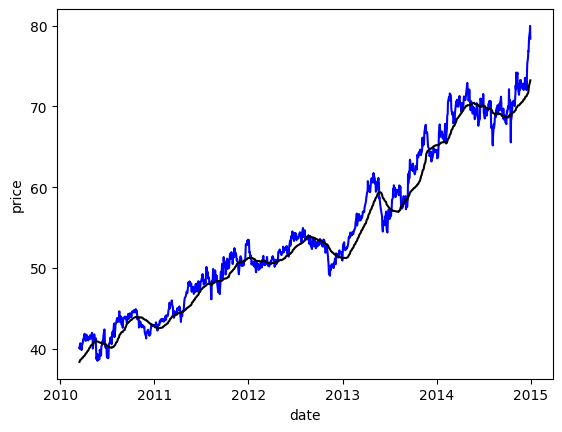

In [139]:
plt.plot(ret['Open'],c='blue')
plt.plot(ret['RollingVWAP'],c='black')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

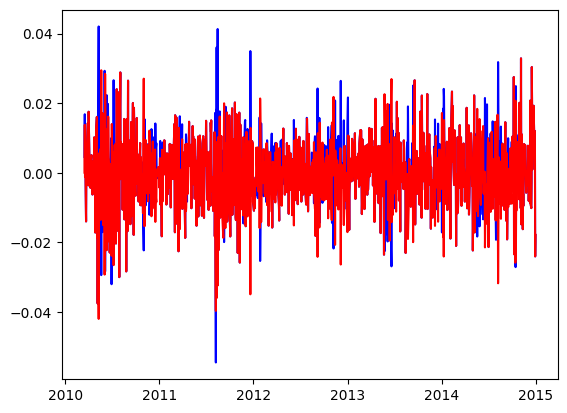

In [140]:
plt.plot(ret['returns'],c='blue')
plt.plot(ret['strat_returns'],c='red')
plt.show()

In [141]:
def cumret(returns):
  return (returns+1).cumprod()

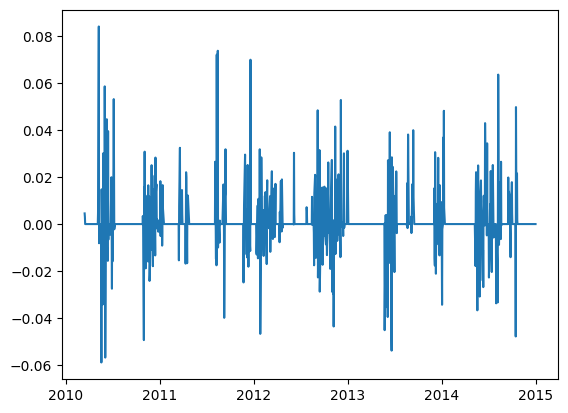

In [142]:
plt.plot(ret['returns']-ret['strat_returns'])

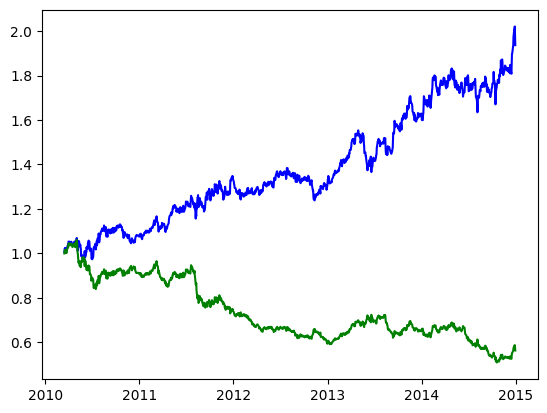

In [143]:
plt.plot(cumret(ret['returns']),c='blue')
plt.plot(cumret(ret['strat_returns']),c='green')
plt.show()

upon close examination we see lot of errors with our entry instead we added a slight modification in order to confirm our entries where we look at both previous days close and current days open to take our entries. 

In [146]:
def statistics(df,get_plots=False):
  if isinstance(df, pd.DataFrame):
    """
    Calculates the drawdowns given a column of daily returns.
    Returns a pandas DataFrame with columns for daily returns,
    cumulative returns, and drawdowns.
    """
    # Calculate cumulative returns
    cum_returns = (1 + df.returns).cumprod()
    cum_returns_strat = (1 + df.strat_returns).cumprod()
    # Calculate the previous peaks
    previous_peaks = cum_returns.cummax()
    previous_peaks_strat = cum_returns_strat.cummax()

    # Calculate the drawdowns
    drawdowns = (cum_returns - previous_peaks) / previous_peaks
    drawdowns_strat = (cum_returns_strat - previous_peaks_strat) / previous_peaks_strat
    # Create a DataFrame with the results
    results = pd.DataFrame({'Cumulative Returns': cum_returns,
                            'Strategy Cumulative Returns': cum_returns_strat,
                            'Drawdowns': drawdowns,
                            'Strategy Drawdowns': drawdowns_strat})
    if get_plots==False:
      return results
    fig,axs = plt.subplots(3,figsize=(10,15))
    axs[0].plot(results.iloc[:,:2],label=results.columns[:2])
    axs[0].set_title('cummulative returns')
    axs[0].set_ylabel('Returns')
    axs[0].set_xlabel('date')
    axs[1].plot(results.iloc[:,2:],label=results.columns[2:])
    axs[1].set_title('drawdown')
    axs[1].set_ylabel('drawdown')
    axs[1].set_xlabel('date')
    axs[2].hist(df.returns,alpha=0.5,bins=30,label='benchmark')
    axs[2].hist(df.strat_returns,alpha=0.5,bins=30,label='strategy')
    axs[2].set_title('distribution of returns')
    axs[2].set_xlabel('returns')
    axs[2].set_ylabel('frequency')
    fig.legend()
    fig.show()
    return results
  else:
    print('invalid datatype')
    return None



In [147]:
statistics(ret)

,Cumulative Returns,Strategy Cumulative Returns,Drawdowns,Strategy Drawdowns
Date,,,,
2010-03-16,1.004533,1.000000,0.000000,0.000000
2010-03-17,1.021405,1.013747,0.000000,0.000000
2010-03-18,1.020146,1.012497,-0.001233,-0.001233
2010-03-19,1.024931,1.017246,0.000000,0.000000
2010-03-22,1.010577,1.002999,-0.014005,-0.014005
...,...,...,...,...
2014-12-24,1.973810,0.574507,0.000000,-0.458770
2014-12-26,1.996474,0.581104,0.000000,-0.452555
2014-12-29,2.020398,0.588067,0.000000,-0.445995


In [148]:
# strategy hypothesis tests

In [149]:
from scipy.stats import ttest_rel

In [150]:
def strat_1tailed_test(df):
  group1=df.returns
  group2=df.strat_returns
  t_stat, p_value = ttest_rel(group2, group1, alternative='greater')

  print('mean_returns of benchmark = ',np.mean(group1))
  print('mean_returns of strategy = ',np.mean(group2))
  if p_value>0.01:
    print(f"null hypothesis cannot be rejected for this strategy")
  else:
    print(f"null hypothesis is rejected for this strategy")
  return p_value

In [151]:
strat_1tailed_test(ret)

mean_returns of benchmark =  0.0005960582206407422
mean_returns of strategy =  -0.0004265579675152014
null hypothesis cannot be rejected for this strategy


0.998850362038924

# VWAP Tests

In [ ]:
VWAP_strat_hypothesis_rejected=dict.fromkeys(sectors)
for sector in sectors:
  VWAP_strat_hypothesis_rejected[sector]={}
  for stock in eval(sector+'_stocks'):
    VWAP_strat_hypothesis_rejected[sector][stock]={}
    for lookback in lookbacks:
      df=VWAP_crossover(stock,lookback,start,end)
      p_value = strat_1tailed_test(df)
      if p_value<0.01:
        VWAP_strat_hypothesis_rejected[sector][stock][lookback]=p_value

In [153]:
VWAP_strat_hypothesis_rejected

{'Tech': {'AAPL': {},
  'MSFT': {},
  'NVDA': {},
  'ADBE': {},
  'CRM': {},
  'GOOGL': {},
  'AMZN': {},
  'IBM': {},
  'INTC': {},
  'CSCO': {}},
 'Healthcare': {'JNJ': {},
  'PFE': {},
  'MRK': {},
  'GILD': {},
  'AMGN': {},
  'BMY': {},
  'LLY': {},
  'REGN': {},
  'UNH': {}},
 'Financial': {'JPM': {},
  'BAC': {},
  'WFC': {},
  'C': {},
  'GS': {},
  'MS': {},
  'V': {},
  'MA': {},
  'AXP': {},
  'SCHW': {}},
 'Consumer_D': {'HD': {},
  'MCD': {},
  'NKE': {},
  'SBUX': {},
  'DIS': {},
  'CMCSA': {},
  'LOW': {},
  'GM': {},
  'F': {},
  'BKNG': {}},
 'Consumer_S': {'PG': {},
  'KO': {},
  'PEP': {},
  'WMT': {},
  'CL': {},
  'KMB': {},
  'CLX': {},
  'MDLZ': {},
  'EL': {}},
 'Industrial': {'BA': {},
  'GE': {},
  'MMM': {},
  'HON': {},
  'CAT': {},
  'RTX': {},
  'LMT': {},
  'GD': {},
  'UNP': {},
  'FDX': {}},
 'Energy': {'XOM': {},
  'CVX': {},
  'BP': {},
  'COP': {},
  'EOG': {},
  'OXY': {},
  'SLB': {},
  'KMI': {},
  'WMB': {}},
 'Utility': {'NEE': {},
  'DUK': {},

# MA strat

In [154]:
def data_prep_MA2(symbol,lookback,start,end,smoothing_choice="s"):
  # Calculate the cumulative sum of price times volume
  df = yf.download(symbol,start,end)
  # Calculate the rolling MAs
  if smoothing_choice=='s':
    df['SMA']=df['Close'].rolling(window=lookback).mean()
  elif smoothing_choice=='e':
    df['EMA']=df['Close'].ewm(span=lookback, adjust=False).mean()
  df['returns']=(df['Close']-df['Open'])/df['Open']
  df["day's return"]=(df['Close']-df['Open'])/df['Open']
  df=df.dropna(axis=0)
  return df 

In [168]:
def MA_crossover(symbol,lookback,start,end,smoothing_choice="s"):
  df = data_prep_MA2(symbol,lookback,start,end,smoothing_choice) # prepares the dataset
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column
  long_trade=False # sets long and short trade indicator to false 
  short_trade=False
  for date in df.index:
    if long_trade: 
      if just_entered:
        #print('entered long trade',df.loc[date]["day's return"])
        df.loc[date,'strat_returns'] = df.loc[date,"day's return"]
        just_entered=False
      else:        
        #print('in long trade',df.loc[date]['returns'])
        df.loc[date,'strat_returns'] = df.loc[date,'returns']
    elif short_trade:
      if just_entered:
        #print('entered short trade',-df.loc[date]["day's return"])
        df.loc[date,'strat_returns'] = -df.loc[date,"day's return"]
        just_entered=False
      else:      
        #print('in short trade',-df.loc[date]['returns'])
        df.loc[date,'strat_returns'] = -df.loc[date,'returns']
    else:
      df.loc[date,'strat_returns'] = 0
    # check for ma type
    if smoothing_choice=='e':
      column = 'EMA'
    else:
      column = 'SMA'
    # strategy entry updates 
    if df.loc[date,'Close'] > df.loc[date,column]:
      if long_trade==False:
        just_entered=True
      long_trade=True
      short_trade=False
    else:
      if short_trade==False:
        just_entered=True
      long_trade=False
      short_trade=True
  return df

In [169]:
MA_crossover(symbol='spy',lookback=50,start=start,end=end,smoothing_choice="e")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,EMA,returns,day's return,strat_returns
Date,,,,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,88.117905,118944600,113.330002,0.008543,0.008543,0.000000
2010-01-05,113.260002,113.680000,112.849998,113.629997,88.351135,111579900,113.341766,0.003267,0.003267,-0.003267
2010-01-06,113.519997,113.989998,113.430000,113.709999,88.413338,116074400,113.356207,0.001674,0.001674,0.001674
2010-01-07,113.500000,114.330002,113.180000,114.190002,88.786575,131091100,113.388905,0.006079,0.006079,0.006079
2010-01-08,113.889999,114.620003,113.660004,114.570000,89.082039,126402800,113.435222,0.005971,0.005971,0.005971
...,...,...,...,...,...,...,...,...,...,...
2014-12-24,208.020004,208.339996,207.720001,207.770004,178.802643,42963400,202.954772,-0.001202,-0.001202,-0.001202
2014-12-26,208.309998,208.850006,208.250000,208.440002,179.379227,57326700,203.169879,0.000624,0.000624,0.000624
2014-12-29,208.220001,208.970001,208.139999,208.720001,179.620193,79643900,203.387531,0.002401,0.002401,0.002401


# MA Tests

In [170]:
MA_strat_hypothesis_rejected=dict.fromkeys(sectors)
for sector in sectors:
  MA_strat_hypothesis_rejected[sector]={}
  for stock in eval(sector+'_stocks'):
    MA_strat_hypothesis_rejected[sector][stock]={}
    for lookback in lookbacks:
      MA_strat_hypothesis_rejected[sector][stock][lookback]={}
      for ma_type in ['s','e']:
        df=MA_crossover(stock,lookback,start,end,ma_type)
        p_value = strat_1tailed_test(df)
      if p_value<0.01:
        MA_strat_hypothesis_rejected[sector][stock][lookback]=p_value

[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0003150235792079753
mean_returns of strategy =  0.0005800591671255369
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0003273646263066634
mean_returns of strategy =  0.0006150851667310684
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00020741662981185117
mean_returns of strategy =  -0.00021805476363694252
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0003273646263066634
mean_returns of strategy =  0.00014120980486850756
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00031632541692995525
mean_returns of strategy =  -4.4328567208029826e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0003273646263066634
mean_returns of strategy =  -7.603699156073912e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0003395870928992651
mean_returns of strategy =  1.3429730409848431e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0003273646263066634
mean_returns of strategy =  -0.00012723183867007875
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0003134994219597129
mean_returns of strategy =  3.561889591169169e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0003273646263066634
mean_returns of strategy =  2.1276505814527396e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00030795381385626604
mean_returns of strategy =  6.27275987456933e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00030873550341844065
mean_returns of strategy =  0.0003623779769873617
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003849900742212444
mean_returns of strategy =  0.0005184004193184444
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00030873550341844065
mean_returns of strategy =  0.00043430878552420954
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003618922779506466
mean_returns of strategy =  0.0005072934711539545
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00030873550341844065
mean_returns of strategy =  0.0006220905677675471
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0004065123223909886
mean_returns of strategy =  0.00044303261467720995
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00030873550341844065
mean_returns of strategy =  0.0005096108451832604
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005840316092018105
mean_returns of strategy =  0.0002468050415026611
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00030873550341844065
mean_returns of strategy =  0.0004948733776317578
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0002494662415677797
mean_returns of strategy =  0.00030687312364483
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0002571786988303855
mean_returns of strategy =  7.439329715571838e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00015100351680923693
mean_returns of strategy =  0.00018700204913370087
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0002571786988303855
mean_returns of strategy =  0.00046333371455715923
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0002653932753126922
mean_returns of strategy =  0.0006273405870799129
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0002571786988303855
mean_returns of strategy =  0.0001858325575447233
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00015796724694808954
mean_returns of strategy =  2.4718052549199082e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0002571786988303855
mean_returns of strategy =  0.00013778669352608718
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  8.446961004531726e-05
mean_returns of strategy =  7.184211324591066e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0002571786988303855
mean_returns of strategy =  0.0003172431520996391
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007904033347691438
mean_returns of strategy =  0.0001761095052433939
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007921525415987062
mean_returns of strategy =  0.00019503169623780994
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0008660450632173778
mean_returns of strategy =  -0.00011604665158803039
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007921525415987062
mean_returns of strategy =  0.00018317167010312998
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0008637418898725664
mean_returns of strategy =  0.00023515436104266859
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007921525415987062
mean_returns of strategy =  0.00033240521793846813
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0009732221441394679
mean_returns of strategy =  0.00028088536650224563
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007921525415987062
mean_returns of strategy =  0.00037029910631451756
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0010513763335546769
mean_returns of strategy =  0.000512474261485049
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007921525415987062
mean_returns of strategy =  0.0005671948009374826
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007920243727365868
mean_returns of strategy =  0.00102377825967165
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000749632046507609
mean_returns of strategy =  0.0013468602437700062
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0008648646633163368
mean_returns of strategy =  0.0005130773576459153
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000749632046507609
mean_returns of strategy =  0.0004948383928618504
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007231161215132081
mean_returns of strategy =  -0.00018844202296021487
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000749632046507609
mean_returns of strategy =  -0.00021033087573071128
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00064622357829384
mean_returns of strategy =  -0.0002592128376087932
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000749632046507609
mean_returns of strategy =  -0.00010682867004295473
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006235790267428299
mean_returns of strategy =  -6.432787971326711e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000749632046507609
mean_returns of strategy =  -0.00010198377043735437
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0003893342870856359
mean_returns of strategy =  0.00022364469999210551
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00041933808854235477
mean_returns of strategy =  0.0003145280288354143
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00033300757135981804
mean_returns of strategy =  0.00048228031148762245
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00041933808854235477
mean_returns of strategy =  0.0006124139482978395
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0003717730808314924
mean_returns of strategy =  0.000236603789085439
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00041933808854235477
mean_returns of strategy =  0.000259300943071379
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0002825503877876096
mean_returns of strategy =  -0.0002639896734617422
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00041933808854235477
mean_returns of strategy =  -0.0002285153130326777
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.000278085072107326
mean_returns of strategy =  -0.00012987472426315882
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00041933808854235477
mean_returns of strategy =  -0.00022279378640751346
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007121027706501197
mean_returns of strategy =  0.00011236330921843223
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006769780640816478
mean_returns of strategy =  -0.00015726160521712342
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007978081098332056
mean_returns of strategy =  0.00038504834292392117
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006769780640816478
mean_returns of strategy =  0.00043222105812402555
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007578435095007158
mean_returns of strategy =  1.617695736609899e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006769780640816478
mean_returns of strategy =  -3.090188796174644e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007637332029156961
mean_returns of strategy =  -0.00030772290254093735
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006769780640816478
mean_returns of strategy =  -0.0003214667403138304
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0004454962883877094
mean_returns of strategy =  -7.474502706888719e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006769780640816478
mean_returns of strategy =  -0.0004392563731861767
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007292647916626091
mean_returns of strategy =  0.0006536572545611907
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007307394686881489
mean_returns of strategy =  0.0006182108486574113
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007738030020760061
mean_returns of strategy =  0.0005642452044894574
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007307394686881489
mean_returns of strategy =  0.0005988783532445143
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007561918285062925
mean_returns of strategy =  0.00037556484774384317
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007307394686881489
mean_returns of strategy =  0.0003673663687483121
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007104364501446379
mean_returns of strategy =  0.0003050705025625786
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007307394686881489
mean_returns of strategy =  0.0001881319108640333
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006074025530733237
mean_returns of strategy =  0.00023066283481837713
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007307394686881489
mean_returns of strategy =  0.000230385290148452
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.000593284660553101
mean_returns of strategy =  0.00017769924579371646
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005894313065333993
mean_returns of strategy =  0.00028906275918174414
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006813644501471746
mean_returns of strategy =  0.00038424256073276374
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005894313065333993
mean_returns of strategy =  0.0005651236695359557
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006448418205992599
mean_returns of strategy =  0.00043490150063747507
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005894313065333993
mean_returns of strategy =  0.0004053835366126538
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006828854658320781
mean_returns of strategy =  0.0005291495093368251
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005894313065333993
mean_returns of strategy =  0.0003779465744331433
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0009247276439347786
mean_returns of strategy =  0.0006220799351403495
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005894313065333993
mean_returns of strategy =  0.00028277578256179887
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00030163248752711983
mean_returns of strategy =  0.0005620278977473273
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0003333241072468452
mean_returns of strategy =  0.0005615482078032229
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003861237555330267
mean_returns of strategy =  0.0008113049726736344
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0003333241072468452
mean_returns of strategy =  0.0007261529443593921
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0002933724896332598
mean_returns of strategy =  0.0006051929874573283
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0003333241072468452
mean_returns of strategy =  0.0007662631849699908
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003416965891760567
mean_returns of strategy =  0.00023929483393127736
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0003333241072468452
mean_returns of strategy =  0.0006470862020740379
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0004255610559330608
mean_returns of strategy =  0.0004529896883274842
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0003333241072468452
mean_returns of strategy =  0.0003923236411715823
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00026306918963803276
mean_returns of strategy =  0.00010735502904355175
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002643780616268527
mean_returns of strategy =  0.00015449124714925344
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00029128143884025944
mean_returns of strategy =  0.00030363893624652373
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002643780616268527
mean_returns of strategy =  0.000297626703633926
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00028887641682734903
mean_returns of strategy =  3.9507943920582396e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002643780616268527
mean_returns of strategy =  -4.654081160244059e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003358227468917416
mean_returns of strategy =  -4.674841044469689e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002643780616268527
mean_returns of strategy =  -4.8342060823841364e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00038142655846534464
mean_returns of strategy =  0.00010044310980469954
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002643780616268527
mean_returns of strategy =  0.00012519264830086627
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003860677138291407
mean_returns of strategy =  -7.085328824910864e-06
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004097735563319558
mean_returns of strategy =  0.00022905457008383587
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00043389935588178017
mean_returns of strategy =  0.00039120781515840857
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004097735563319558
mean_returns of strategy =  0.00040995078428659933
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00047779428900535933
mean_returns of strategy =  0.0006817724020029316
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004097735563319558
mean_returns of strategy =  0.0009302807217387482
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005883327466274174
mean_returns of strategy =  0.0008135496313496045
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004097735563319558
mean_returns of strategy =  0.0007181498177892456
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006563511732576195
mean_returns of strategy =  0.00042891430239910204
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004097735563319558
mean_returns of strategy =  0.0005762311531000838
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00021235233881771807
mean_returns of strategy =  8.904560996322178e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00023002904774896852
mean_returns of strategy =  7.974531964676921e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00024360001934920015
mean_returns of strategy =  0.0002878239878874964
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00023002904774896852
mean_returns of strategy =  -6.838262724680143e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0002802773129260574
mean_returns of strategy =  -0.00023038062139296486
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00023002904774896852
mean_returns of strategy =  -0.00015177441380535264
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0004126407600842192
mean_returns of strategy =  -1.5316353181487566e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00023002904774896852
mean_returns of strategy =  2.4143856157098724e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003267520525758601
mean_returns of strategy =  0.00024770846882914935
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00023002904774896852
mean_returns of strategy =  0.00011409213608226788
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -4.7010844384233106e-05
mean_returns of strategy =  9.573804392596173e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -2.7349290639820765e-05
mean_returns of strategy =  0.0001249727420288449
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -4.9820117543034755e-05
mean_returns of strategy =  6.942018623323292e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -2.7349290639820765e-05
mean_returns of strategy =  1.728468263769887e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -4.900034849255784e-05
mean_returns of strategy =  -8.186836066221243e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -2.7349290639820765e-05
mean_returns of strategy =  2.5366323275570556e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0001367839760595142
mean_returns of strategy =  -0.00018512992422272574
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -2.7349290639820765e-05
mean_returns of strategy =  -0.0001001376942261469
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0001267820277603005
mean_returns of strategy =  -0.0005598928683926619
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -2.7349290639820765e-05
mean_returns of strategy =  -0.00037614988142347126
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0009098394136779834
mean_returns of strategy =  -0.00018569253450389318
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0009120395905426179
mean_returns of strategy =  -7.36115751853742e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0009035599300257774
mean_returns of strategy =  6.011699521666359e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0009120395905426179
mean_returns of strategy =  0.00022616770936935733
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0009344598231088968
mean_returns of strategy =  0.0003795908159108937
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0009120395905426179
mean_returns of strategy =  9.823711708559957e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0009676037090361711
mean_returns of strategy =  -0.00015949077977322354
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0009120395905426179
mean_returns of strategy =  0.0003041760273059842
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0009633601805816402
mean_returns of strategy =  0.0003101174925575918
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0009120395905426179
mean_returns of strategy =  0.0002708283430184343
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007464659355771107
mean_returns of strategy =  0.00053335668000638
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007327866412495593
mean_returns of strategy =  0.0006522541400801598
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00078273269144249
mean_returns of strategy =  0.0010345887446887028
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007327866412495593
mean_returns of strategy =  0.0008605086597688471
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007553585139264497
mean_returns of strategy =  0.000624535516653282
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007327866412495593
mean_returns of strategy =  0.0006056490645410066
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0008643261584149079
mean_returns of strategy =  0.00039855798906013204
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007327866412495593
mean_returns of strategy =  0.00042251037886487997
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0008826581937923101
mean_returns of strategy =  0.00043248333157138276
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007327866412495593
mean_returns of strategy =  0.00046285308819166317
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00031975098587345394
mean_returns of strategy =  0.00021024623256898494
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00031691132272023423
mean_returns of strategy =  0.00012063201326708752
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00034200540061948967
mean_returns of strategy =  0.0003221372495977758
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00031691132272023423
mean_returns of strategy =  0.00041354800979827614
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00034317243591022067
mean_returns of strategy =  -3.2268292566616885e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00031691132272023423
mean_returns of strategy =  0.0002210615330253658
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00042081825865560865
mean_returns of strategy =  0.00015224350722428334
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00031691132272023423
mean_returns of strategy =  0.00021494595960787837
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00038886569695277106
mean_returns of strategy =  3.879368995087493e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00031691132272023423
mean_returns of strategy =  0.00011914481809983467
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0013556904296671733
mean_returns of strategy =  0.0005509064797016069
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0013709848044985349
mean_returns of strategy =  0.0005395468770886531
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0013278880423305485
mean_returns of strategy =  0.0006529752027072787
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0013709848044985349
mean_returns of strategy =  0.0006076861961097401
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.001378636504031862
mean_returns of strategy =  0.0006928923295130715
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0013709848044985349
mean_returns of strategy =  -0.0003808679252997893
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.001306022296414722
mean_returns of strategy =  7.39779720460704e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0013709848044985349
mean_returns of strategy =  -8.919584127041524e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.001376146094669937
mean_returns of strategy =  0.0008264688031523666
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0013709848044985349
mean_returns of strategy =  0.0005238985749661161
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0009063066983480254
mean_returns of strategy =  -0.0001109681995445888
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0009376901310796522
mean_returns of strategy =  -0.00024239837760791643
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0009806916144665995
mean_returns of strategy =  6.486866041227996e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0009376901310796522
mean_returns of strategy =  -0.00018207163162347408
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0009944340937828834
mean_returns of strategy =  -0.00017767808218233907
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0009376901310796522
mean_returns of strategy =  -0.0002851432391959437
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0011253949210933757
mean_returns of strategy =  -2.7280480430513687e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0009376901310796522
mean_returns of strategy =  -0.0003312265419740793
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.001074007888858292
mean_returns of strategy =  0.0003354675075194367
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0009376901310796522
mean_returns of strategy =  0.0003076401264930849
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  8.194970467234647e-05
mean_returns of strategy =  0.0004761379345816823
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001437776075215107
mean_returns of strategy =  0.00016969648882277942
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00017705308541645612
mean_returns of strategy =  0.00046240543767906035
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001437776075215107
mean_returns of strategy =  0.0005945485255874531
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00013374392579968043
mean_returns of strategy =  0.0003294027261517539
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001437776075215107
mean_returns of strategy =  0.00040209333882590604
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00019476854971614693
mean_returns of strategy =  0.0005100269278760711
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001437776075215107
mean_returns of strategy =  0.00014137432869594483
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003777405251936594
mean_returns of strategy =  0.0002088523788657485
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001437776075215107
mean_returns of strategy =  0.00016905189520345653
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0013094570140988605
mean_returns of strategy =  0.00048340291031976663
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0012537783787373788
mean_returns of strategy =  0.0005101891321425896
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.001260634615163113
mean_returns of strategy =  0.0011575597871929587
null hypothesis is rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0012537783787373788
mean_returns of strategy =  0.0013780371649858222
null hypothesis is rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.001359973154852072
mean_returns of strategy =  0.0009581394612672132
null hypothesis is rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0012537783787373788
mean_returns of strategy =  0.0014313871905012928
null hypothesis is rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0013101627797403312
mean_returns of strategy =  0.0015213404848309184
null hypothesis is rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0012537783787373788
mean_returns of strategy =  0.0011495248693423905
null hypothesis is rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.000975337129803825
mean_returns of strategy =  0.0004510174336191325
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0012537783787373788
mean_returns of strategy =  0.0007818445771418495
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00034255285168757906
mean_returns of strategy =  -0.000497346698505542
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004001819482462207
mean_returns of strategy =  -0.0005541297281064205
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00033177667448247924
mean_returns of strategy =  -0.00043070068673032246
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004001819482462207
mean_returns of strategy =  -0.0003490086563028025
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00030737430055701766
mean_returns of strategy =  0.00019496706569848785
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004001819482462207
mean_returns of strategy =  5.007786810954063e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00021021514358597412
mean_returns of strategy =  0.00032932702400049595
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004001819482462207
mean_returns of strategy =  0.00037719784480265634
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006227267991788387
mean_returns of strategy =  0.00016129162150584403
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004001819482462207
mean_returns of strategy =  0.00024353161219930678
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0005696400592508113
mean_returns of strategy =  0.0006234989581766916
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0005658051206932941
mean_returns of strategy =  0.0003471817483572287
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0005149570945693205
mean_returns of strategy =  0.0009796998323060046
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0005658051206932941
mean_returns of strategy =  0.0010023325472764
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0005975061413702678
mean_returns of strategy =  0.0008243364408344026
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0005658051206932941
mean_returns of strategy =  0.0006788927982039644
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00041800280422270395
mean_returns of strategy =  0.0006128807979435934
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0005658051206932941
mean_returns of strategy =  6.575693360695628e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00019451400414011605
mean_returns of strategy =  0.0003407859947322244
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0005658051206932941
mean_returns of strategy =  -0.00046775830346496505
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  7.996844514325297e-06
mean_returns of strategy =  0.0006603932713165343
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  1.6514030121655544e-05
mean_returns of strategy =  0.0006179345549181154
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00011941937817902338
mean_returns of strategy =  0.0007455824392656974
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  1.6514030121655544e-05
mean_returns of strategy =  0.0009638982490486123
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  1.860792503350192e-05
mean_returns of strategy =  0.000871796268990581
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  1.6514030121655544e-05
mean_returns of strategy =  0.0008705578985558185
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00023445163167259373
mean_returns of strategy =  0.00077159491216882
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  1.6514030121655544e-05
mean_returns of strategy =  0.0008144059222106295
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00032855611906222696
mean_returns of strategy =  0.0005687281230096431
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  1.6514030121655544e-05
mean_returns of strategy =  0.00043666369808115045
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0006105629376668087
mean_returns of strategy =  0.00023355742452461632
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0005769829115634655
mean_returns of strategy =  0.000361736625646825
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.000511841367195717
mean_returns of strategy =  -4.691440183890669e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0005769829115634655
mean_returns of strategy =  0.0004508781134815479
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0006188819858459385
mean_returns of strategy =  0.0005948613137606073
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0005769829115634655
mean_returns of strategy =  0.0006888861965282633
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.000624444108735374
mean_returns of strategy =  0.0007541870853993759
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0005769829115634655
mean_returns of strategy =  0.0004940865555779511
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0004934489529060932
mean_returns of strategy =  0.00035004342507241376
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0005769829115634655
mean_returns of strategy =  0.0005602356015978787
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00048425027340216075
mean_returns of strategy =  -0.0004090736923590936
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00047739219193996147
mean_returns of strategy =  -0.00016661127307122798
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005303186367343277
mean_returns of strategy =  -0.0002247052159031715
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00047739219193996147
mean_returns of strategy =  -0.00010550179502866242
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00046908499888371645
mean_returns of strategy =  0.00025611843662379143
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00047739219193996147
mean_returns of strategy =  0.0001942559266959589
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006897639034298503
mean_returns of strategy =  -5.9849872924166865e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00047739219193996147
mean_returns of strategy =  2.5494063541067268e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007786409024716144
mean_returns of strategy =  0.0005655701926986975
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00047739219193996147
mean_returns of strategy =  0.00038304817672169
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003990143042611491
mean_returns of strategy =  -0.00032927407728254815
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000391161792118671
mean_returns of strategy =  -0.00033837203757241857
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0004295619990616382
mean_returns of strategy =  -0.0005017781678363152
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000391161792118671
mean_returns of strategy =  -0.0006210296753327872
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00041545704597976697
mean_returns of strategy =  -0.00024473903103959494
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000391161792118671
mean_returns of strategy =  -0.00010067808964452149
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005528586354198304
mean_returns of strategy =  -5.972502047890653e-06
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000391161792118671
mean_returns of strategy =  0.00014573190677020178
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005746913846567377
mean_returns of strategy =  0.0003000051165335177
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000391161792118671
mean_returns of strategy =  0.00032435720559118893
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0004822344471609164
mean_returns of strategy =  0.0001521521089564313
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005188137226589678
mean_returns of strategy =  0.00015862118338191424
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005561335948656813
mean_returns of strategy =  9.444658635439082e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005188137226589678
mean_returns of strategy =  0.00024350031759223464
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005089494855714652
mean_returns of strategy =  0.0001760305289540785
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005188137226589678
mean_returns of strategy =  4.765047827198422e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005048037019796958
mean_returns of strategy =  -0.00047228188890271664
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005188137226589678
mean_returns of strategy =  -0.00021919873769989532
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006460458281031861
mean_returns of strategy =  0.00013642661423240315
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005188137226589678
mean_returns of strategy =  -0.00023608288313450496
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005778194876526034
mean_returns of strategy =  -0.0005188780288663386
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006008599384442964
mean_returns of strategy =  -0.00036373894003117904
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006074665508850822
mean_returns of strategy =  -1.79880450058273e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006008599384442964
mean_returns of strategy =  8.548139896366774e-07
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006092085732074069
mean_returns of strategy =  0.0003814023792321944
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006008599384442964
mean_returns of strategy =  9.598547822745586e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006674665468849776
mean_returns of strategy =  0.0004925092508909132
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006008599384442964
mean_returns of strategy =  0.00036726850072619084
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0009401509242217813
mean_returns of strategy =  0.00011176499288684056
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006008599384442964
mean_returns of strategy =  0.0003523590445280725
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0009105890974647409
mean_returns of strategy =  6.044220373715162e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0008755849485503957
mean_returns of strategy =  7.446265120174691e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0009149177708530068
mean_returns of strategy =  1.7966971458133233e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0008755849485503957
mean_returns of strategy =  -3.099288702711369e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.000826117931447172
mean_returns of strategy =  0.00013984681875551272
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0008755849485503957
mean_returns of strategy =  4.156616817071469e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007463962250082938
mean_returns of strategy =  0.0005383365566215459
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0008755849485503957
mean_returns of strategy =  0.0006840981872043577
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0009588759427389363
mean_returns of strategy =  0.0004670995253226709
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0008755849485503957
mean_returns of strategy =  0.0005469519462308318
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0002203916845750986
mean_returns of strategy =  3.812695589309327e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002181927860534888
mean_returns of strategy =  4.008961093019401e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0002265743651096507
mean_returns of strategy =  -6.66592852569044e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002181927860534888
mean_returns of strategy =  -3.0641857328612034e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00021302215560139762
mean_returns of strategy =  -3.026130908432749e-06
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002181927860534888
mean_returns of strategy =  -9.781493907668651e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.000197395073469938
mean_returns of strategy =  0.00014210086426544126
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002181927860534888
mean_returns of strategy =  5.798863651356029e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00010614373607866241
mean_returns of strategy =  2.877883252300754e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002181927860534888
mean_returns of strategy =  1.934990278182861e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00080431231242777
mean_returns of strategy =  -0.0002714062787834292
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007962136080342366
mean_returns of strategy =  -1.71102685620364e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.000826129455546564
mean_returns of strategy =  7.863378875266959e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007962136080342366
mean_returns of strategy =  -0.0002730849217369405
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007555882021494321
mean_returns of strategy =  -0.0004081219410003996
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007962136080342366
mean_returns of strategy =  -0.0004169570139047948
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007326288934656237
mean_returns of strategy =  -0.0002158347990123113
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007962136080342366
mean_returns of strategy =  -0.00015815843181121893
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007115015234404931
mean_returns of strategy =  -0.0004747889550553727
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007962136080342366
mean_returns of strategy =  4.4532136227432987e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006999883350163551
mean_returns of strategy =  -0.00023266921312323886
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007200290552223787
mean_returns of strategy =  -0.00039312046067553163
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0008003127506597741
mean_returns of strategy =  -0.0003130782350870804
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007200290552223787
mean_returns of strategy =  -0.00023224199857216495
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006832459711503285
mean_returns of strategy =  5.8594043890052e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007200290552223787
mean_returns of strategy =  8.042127138860653e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006016273291702052
mean_returns of strategy =  0.00015735319082096645
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007200290552223787
mean_returns of strategy =  0.00021185332058753728
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005530589388027998
mean_returns of strategy =  0.0003823618101287239
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007200290552223787
mean_returns of strategy =  0.000400261133957979
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007199611125614538
mean_returns of strategy =  0.00026397362672055303
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007087962299041986
mean_returns of strategy =  0.00039754469165268575
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007669494511233705
mean_returns of strategy =  0.00024901944598339747
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007087962299041986
mean_returns of strategy =  0.0002961304278980233
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006416851828383903
mean_returns of strategy =  0.0003844817075579672
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007087962299041986
mean_returns of strategy =  0.0002318914693855481
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006192686606296866
mean_returns of strategy =  0.0001470202478480404
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007087962299041986
mean_returns of strategy =  9.506594329303521e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006307596358914116
mean_returns of strategy =  0.0005642468100700987
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007087962299041986
mean_returns of strategy =  0.0003088052941704531
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007035923424834954
mean_returns of strategy =  4.0590084786782924e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006950289246486638
mean_returns of strategy =  9.762219940069323e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007606343885842684
mean_returns of strategy =  0.00023980351448533023
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006950289246486638
mean_returns of strategy =  -2.034793880857079e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007177347929131445
mean_returns of strategy =  -0.00020222433965273078
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006950289246486638
mean_returns of strategy =  3.862389776779308e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006422481689054214
mean_returns of strategy =  2.1998231538958906e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006950289246486638
mean_returns of strategy =  -5.1199166913885764e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006324725237394465
mean_returns of strategy =  0.000400548698476643
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006950289246486638
mean_returns of strategy =  9.104224416418449e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0010029069643850122
mean_returns of strategy =  0.00015625660264808464
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0009876380946616567
mean_returns of strategy =  0.0001548251617631918
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0010702039083099262
mean_returns of strategy =  1.8657309276240985e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0009876380946616567
mean_returns of strategy =  0.00013115561838160516
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0009813160346970585
mean_returns of strategy =  0.00029095765825909225
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0009876380946616567
mean_returns of strategy =  0.0005305254633810233
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0009998192183317994
mean_returns of strategy =  0.00029190645524997035
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0009876380946616567
mean_returns of strategy =  0.0002692675155362031
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0013210470781534838
mean_returns of strategy =  0.00017678879398249332
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0009876380946616567
mean_returns of strategy =  0.0003606032878183578
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00034794165064150513
mean_returns of strategy =  -0.0007487151441995169
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0003643723395506649
mean_returns of strategy =  -0.000110246852562759
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00031742037687383987
mean_returns of strategy =  0.00011385576354410362
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0003643723395506649
mean_returns of strategy =  3.808897931002072e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00038857454229342673
mean_returns of strategy =  1.979064687668244e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0003643723395506649
mean_returns of strategy =  -7.556324001194223e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00015143087723850938
mean_returns of strategy =  9.780822492400745e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0003643723395506649
mean_returns of strategy =  0.00017001903001712614
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  4.4359592660353546e-05
mean_returns of strategy =  -0.0009970457011446161
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0003643723395506649
mean_returns of strategy =  -0.0004308388119501852
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0008479911801566072
mean_returns of strategy =  0.0002508368067209788
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0007772469600125176
mean_returns of strategy =  0.00035931711003058713
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0007346807036613826
mean_returns of strategy =  0.0004884927798793721
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0007772469600125176
mean_returns of strategy =  0.0007235309512839138
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0008336481319598673
mean_returns of strategy =  0.0007892515170215689
null hypothesis is rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0007772469600125176
mean_returns of strategy =  0.0005734703468075643
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.000787377233751035
mean_returns of strategy =  0.0006628909903425475
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0007772469600125176
mean_returns of strategy =  0.00014626603686039493
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0007771535034415092
mean_returns of strategy =  2.7755589236480122e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0007772469600125176
mean_returns of strategy =  -0.00018972339226539038
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00021127076496574703
mean_returns of strategy =  0.0003982198614372985
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001978586110811783
mean_returns of strategy =  9.9833148801338e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.000278667989443851
mean_returns of strategy =  6.305858321066098e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001978586110811783
mean_returns of strategy =  -3.660051492207164e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00020261755021651099
mean_returns of strategy =  -0.00020575009709816448
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001978586110811783
mean_returns of strategy =  -7.877702154924201e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00018211426358248812
mean_returns of strategy =  -0.00042567308148219106
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001978586110811783
mean_returns of strategy =  -0.0003383618029573293
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  5.741685299568239e-05
mean_returns of strategy =  -0.00022323548847744964
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001978586110811783
mean_returns of strategy =  -0.00029971902653401944
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006165677910917762
mean_returns of strategy =  0.0005098240971245366
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006223259750958946
mean_returns of strategy =  0.00043558054044020195
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006224295489087734
mean_returns of strategy =  0.00024748998739147326
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006223259750958946
mean_returns of strategy =  0.00030891930190679975
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005948275786671328
mean_returns of strategy =  9.085008502467632e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006223259750958946
mean_returns of strategy =  0.00025702448636491737
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005722887252463494
mean_returns of strategy =  9.304205833432262e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006223259750958946
mean_returns of strategy =  4.95951094078831e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005493701770711744
mean_returns of strategy =  0.0002390055790161411
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006223259750958946
mean_returns of strategy =  7.985761001648953e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00032774254589498623
mean_returns of strategy =  0.00020251929673938433
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00034001306086846154
mean_returns of strategy =  0.0003028442381297856
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00036816623392213195
mean_returns of strategy =  0.0008297610756818558
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00034001306086846154
mean_returns of strategy =  0.0007045082528505114
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00040425217398937224
mean_returns of strategy =  0.000860896765293722
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00034001306086846154
mean_returns of strategy =  0.0007750934813911765
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00047940384151268944
mean_returns of strategy =  0.0005642374360419202
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00034001306086846154
mean_returns of strategy =  0.0004253263382694659
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003727106900910186
mean_returns of strategy =  0.00019884366315063662
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00034001306086846154
mean_returns of strategy =  0.0003475223115339423
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005577851484488008
mean_returns of strategy =  -3.4027818988547706e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005768620213059297
mean_returns of strategy =  9.920049655509825e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.000587416212458967
mean_returns of strategy =  0.0001840075030385448
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005768620213059297
mean_returns of strategy =  0.0001886635477402846
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005238914117735059
mean_returns of strategy =  0.0003824230956138728
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005768620213059297
mean_returns of strategy =  0.00028840913016025605
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005398591639206188
mean_returns of strategy =  0.00017895712380088606
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005768620213059297
mean_returns of strategy =  6.884061575409434e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0004924328523371515
mean_returns of strategy =  0.00032404164190252393
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005768620213059297
mean_returns of strategy =  0.00020016674477992127
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006356081792492689
mean_returns of strategy =  0.00039665444829413285
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006577669256932362
mean_returns of strategy =  0.00043225404997488656
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006843832550062738
mean_returns of strategy =  0.00040815916682800134
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006577669256932362
mean_returns of strategy =  0.0004809858230819513
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006593951880163242
mean_returns of strategy =  0.00024076539553418919
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006577669256932362
mean_returns of strategy =  0.0003557028982297349
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007249728353191212
mean_returns of strategy =  6.466236588928045e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006577669256932362
mean_returns of strategy =  0.00012547660407548838
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007837957729552854
mean_returns of strategy =  0.00015590258953310164
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006577669256932362
mean_returns of strategy =  0.00019370360977186786
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007094226704957884
mean_returns of strategy =  5.283964502035441e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007474300396259025
mean_returns of strategy =  0.00026400605572804637
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.000735992468505247
mean_returns of strategy =  5.3402283985364394e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007474300396259025
mean_returns of strategy =  9.6921805450633e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007050591135354078
mean_returns of strategy =  0.00029935270199902864
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007474300396259025
mean_returns of strategy =  0.0001696798933402921
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007486708799182215
mean_returns of strategy =  0.00012708764067505263
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007474300396259025
mean_returns of strategy =  0.0001764383913315124
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007751763156200136
mean_returns of strategy =  0.00045549070037114
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007474300396259025
mean_returns of strategy =  0.0002537226089163975
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005013550163444448
mean_returns of strategy =  0.00016833477194422219
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004886411081396065
mean_returns of strategy =  0.00019475391121294918
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005650955794827617
mean_returns of strategy =  -7.918954150973193e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004886411081396065
mean_returns of strategy =  0.00013606167279272784
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005854352710314964
mean_returns of strategy =  4.042014444730629e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004886411081396065
mean_returns of strategy =  0.0002494392130778531
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006035058144850655
mean_returns of strategy =  0.00034031272186673273
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004886411081396065
mean_returns of strategy =  0.0002907980562714058
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.000598845931710916
mean_returns of strategy =  0.0003723237128203569
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004886411081396065
mean_returns of strategy =  0.00036862355714078094
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005110192203826627
mean_returns of strategy =  9.546406066648401e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005282853635494779
mean_returns of strategy =  5.8049737516519264e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.000553194470034625
mean_returns of strategy =  0.0002535590085076714
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005282853635494779
mean_returns of strategy =  0.00010767162864159405
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005295493998520041
mean_returns of strategy =  -0.00012074727318213388
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005282853635494779
mean_returns of strategy =  0.0001430490534216472
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.000550747986408426
mean_returns of strategy =  -7.507362564090698e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005282853635494779
mean_returns of strategy =  6.507742884764145e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.000577878636483988
mean_returns of strategy =  -3.266788892327098e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005282853635494779
mean_returns of strategy =  7.5664929579662554e-06
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005900949513993032
mean_returns of strategy =  3.827166240756373e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006193228824371088
mean_returns of strategy =  0.0002306451091903448
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005428472006381346
mean_returns of strategy =  0.00015744284717589157
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006193228824371088
mean_returns of strategy =  0.00027141083727473585
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0004921188824651174
mean_returns of strategy =  1.984294020892243e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006193228824371088
mean_returns of strategy =  -3.3188309763366406e-06
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005640740561670582
mean_returns of strategy =  -0.00016662960628512034
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006193228824371088
mean_returns of strategy =  -0.00037213577812064246
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005549216220908139
mean_returns of strategy =  0.00014391464949496232
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006193228824371088
mean_returns of strategy =  -0.00010401239174482026
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0009540376956699575
mean_returns of strategy =  0.00018934208221838014
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000970205644217806
mean_returns of strategy =  0.000239443876436257
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0009730718166552127
mean_returns of strategy =  0.00013876547876379673
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000970205644217806
mean_returns of strategy =  1.559548742042828e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0008290563982397927
mean_returns of strategy =  0.0006185577849407763
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000970205644217806
mean_returns of strategy =  0.0005365793402163947
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0008321917150779871
mean_returns of strategy =  -4.0709586978318435e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000970205644217806
mean_returns of strategy =  0.00019167795822676713
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006583061063136955
mean_returns of strategy =  0.00018899600494632937
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000970205644217806
mean_returns of strategy =  0.0004677039916463752
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  5.699337059718519e-05
mean_returns of strategy =  -0.00018259363741006745
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00014419232212135676
mean_returns of strategy =  -0.00018888515593357393
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  7.336743385093172e-05
mean_returns of strategy =  -0.0003146436413287223
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00014419232212135676
mean_returns of strategy =  -0.00031020643694735394
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -1.9704623822037812e-05
mean_returns of strategy =  1.7093410101636133e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00014419232212135676
mean_returns of strategy =  3.8155759594166175e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  1.3243736284673723e-05
mean_returns of strategy =  7.228580784830976e-06
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00014419232212135676
mean_returns of strategy =  2.952079109897328e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  8.554354253881749e-05
mean_returns of strategy =  0.00034760905155643395
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00014419232212135676
mean_returns of strategy =  -0.000315385715832387
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0002492965419444391
mean_returns of strategy =  0.0002912559535936829
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00017339691904221706
mean_returns of strategy =  0.00010983983299104595
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00017828110719938085
mean_returns of strategy =  0.00041258400019048746
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00017339691904221706
mean_returns of strategy =  0.0003268573427845477
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0002403866947619447
mean_returns of strategy =  0.0002820834479883105
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00017339691904221706
mean_returns of strategy =  0.00036572647425712557
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0002057152405629535
mean_returns of strategy =  0.00043260207804551154
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00017339691904221706
mean_returns of strategy =  4.143411599791044e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00013773140306367202
mean_returns of strategy =  -5.631780664765562e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00017339691904221706
mean_returns of strategy =  -0.00026602579115953554
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005010533805753021
mean_returns of strategy =  9.639908083045024e-06
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004998057108574163
mean_returns of strategy =  0.00019271472217227828
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005453223836931089
mean_returns of strategy =  0.00018139889187677682
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004998057108574163
mean_returns of strategy =  0.00014724803963868851
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005565606957149273
mean_returns of strategy =  0.00026098386572610257
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004998057108574163
mean_returns of strategy =  0.00022897431485413615
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005848840466158449
mean_returns of strategy =  0.0004022638997584937
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004998057108574163
mean_returns of strategy =  0.0003558763775567756
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006112804661018651
mean_returns of strategy =  0.0005891911719345753
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0004998057108574163
mean_returns of strategy =  0.0003791742717332157
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00040164170535909324
mean_returns of strategy =  -0.00011774379629805054
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000462811868374739
mean_returns of strategy =  -1.1883882641959282e-06
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.000455511049891035
mean_returns of strategy =  -0.0001998153014833755
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000462811868374739
mean_returns of strategy =  -3.99734335520452e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003861129088605531
mean_returns of strategy =  -8.935896164754811e-06
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000462811868374739
mean_returns of strategy =  3.809179744198878e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0004069993513634403
mean_returns of strategy =  0.0002260416048095192
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000462811868374739
mean_returns of strategy =  9.096817181709782e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0004171893234944035
mean_returns of strategy =  0.00017917156733150656
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000462811868374739
mean_returns of strategy =  -1.4914000962266426e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00013081754889540838
mean_returns of strategy =  0.0006632381936879205
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -5.042692243621448e-05
mean_returns of strategy =  0.0008237914859294992
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -3.6063756390073083e-05
mean_returns of strategy =  0.0011472738548842852
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -5.042692243621448e-05
mean_returns of strategy =  0.0012583216610879942
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00010497490957481915
mean_returns of strategy =  0.0006477543182625146
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -5.042692243621448e-05
mean_returns of strategy =  0.0007855096445841228
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0001634139501628746
mean_returns of strategy =  0.0004959320312388619
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -5.042692243621448e-05
mean_returns of strategy =  0.0004155400065930212
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00031444134868500594
mean_returns of strategy =  0.00039477596583465925
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -5.042692243621448e-05
mean_returns of strategy =  0.00029243676032426815
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  9.245686682038164e-05
mean_returns of strategy =  -0.00015705457350660907
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001250278592424667
mean_returns of strategy =  -0.00015569082492540755
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00012703343533382593
mean_returns of strategy =  2.2841798216257388e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001250278592424667
mean_returns of strategy =  6.408650615424776e-06
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  9.392691405913626e-05
mean_returns of strategy =  6.457589611618513e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001250278592424667
mean_returns of strategy =  -7.219238090503164e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0001157208600679272
mean_returns of strategy =  0.00016954681088801222
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001250278592424667
mean_returns of strategy =  0.0002999056693090999
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  8.484224872080213e-05
mean_returns of strategy =  0.0001995946951377507
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001250278592424667
mean_returns of strategy =  0.0002100790502845866
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005296035239785995
mean_returns of strategy =  0.00016513438485788804
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005584979725600916
mean_returns of strategy =  3.515330490508922e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005672768556485356
mean_returns of strategy =  -8.7171908080777e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005584979725600916
mean_returns of strategy =  5.569676426248484e-07
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00047384349523165733
mean_returns of strategy =  -7.323750682409089e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005584979725600916
mean_returns of strategy =  -4.710366886566822e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0004957241740931185
mean_returns of strategy =  0.00020728653498643113
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005584979725600916
mean_returns of strategy =  0.00012708411414523346
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006885482913133984
mean_returns of strategy =  0.00020161887474558774
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005584979725600916
mean_returns of strategy =  2.6064047192842102e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006464153619031446
mean_returns of strategy =  0.00046805906620784476
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006776492538844346
mean_returns of strategy =  0.000457694286852898
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.000707864291112487
mean_returns of strategy =  0.00041584140461430486
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006776492538844346
mean_returns of strategy =  0.00033670075164912814
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006176135573984444
mean_returns of strategy =  0.00042673055710190253
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006776492538844346
mean_returns of strategy =  0.0006289786718485454
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006931576441278672
mean_returns of strategy =  0.00030590665822642345
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006776492538844346
mean_returns of strategy =  0.0003093599032041882
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0008038202064211636
mean_returns of strategy =  0.0006032034579258327
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006776492538844346
mean_returns of strategy =  0.00033569665423404174
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007447799573946699
mean_returns of strategy =  -0.0006311911423689222
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007762198769728404
mean_returns of strategy =  -0.0007131870298641939
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.000828144063172816
mean_returns of strategy =  -0.0005973345586889072
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007762198769728404
mean_returns of strategy =  -0.00043868681281743286
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007074581099306459
mean_returns of strategy =  -0.0003679974155933954
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007762198769728404
mean_returns of strategy =  -0.00045245992014025934
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007012786991296612
mean_returns of strategy =  4.658744820802084e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007762198769728404
mean_returns of strategy =  5.721969699814744e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006744621785908086
mean_returns of strategy =  0.00045699185007167095
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0007762198769728404
mean_returns of strategy =  0.0004989945826095226
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0002604912630662075
mean_returns of strategy =  2.06203260352286e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00026377667827865895
mean_returns of strategy =  9.113699570164002e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003399435264072953
mean_returns of strategy =  0.000147075043234644
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00026377667827865895
mean_returns of strategy =  7.04713059493064e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0002556433376304534
mean_returns of strategy =  0.00014327428649782488
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00026377667827865895
mean_returns of strategy =  -6.31939396446183e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0002624493747110233
mean_returns of strategy =  -0.0003174267576566271
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00026377667827865895
mean_returns of strategy =  0.00015769166290915078
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003285271912543029
mean_returns of strategy =  0.0004966295504640661
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00026377667827865895
mean_returns of strategy =  9.702590683825712e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005321553080426845
mean_returns of strategy =  2.9567298779519134e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005432541407295878
mean_returns of strategy =  9.281616288003144e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005897991693423176
mean_returns of strategy =  0.00021691479183698592
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005432541407295878
mean_returns of strategy =  0.0003727000668766146
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006232869076992398
mean_returns of strategy =  0.00025337680189864507
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005432541407295878
mean_returns of strategy =  0.0003292052735228926
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.000688689610871452
mean_returns of strategy =  0.00017837978946249477
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005432541407295878
mean_returns of strategy =  0.0003630167785517694
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007481425279880381
mean_returns of strategy =  0.00012173270930352545
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005432541407295878
mean_returns of strategy =  0.0005114706874935174
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00021944337342558531
mean_returns of strategy =  0.00041958459776648207
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002472030823194259
mean_returns of strategy =  0.0004612597346042735
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0002899650175072476
mean_returns of strategy =  0.00021677991478996807
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002472030823194259
mean_returns of strategy =  0.0005711611639983891
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0002750437145325629
mean_returns of strategy =  0.00031116968757651274
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002472030823194259
mean_returns of strategy =  0.00043366024775784613
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00023943171064126078
mean_returns of strategy =  0.00020230538643574875
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002472030823194259
mean_returns of strategy =  0.00017499283427611142
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00023145786922917612
mean_returns of strategy =  5.876553370075419e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002472030823194259
mean_returns of strategy =  2.4205761422606423e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00022869656307563822
mean_returns of strategy =  0.0003766820131666181
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002502025608396333
mean_returns of strategy =  0.0004224930576150354
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0002693430278340329
mean_returns of strategy =  0.00012075477515638651
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002502025608396333
mean_returns of strategy =  0.0003517047913653658
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00015836941552143603
mean_returns of strategy =  0.00019487681765528752
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002502025608396333
mean_returns of strategy =  0.0001653108389742829
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00021865466407901447
mean_returns of strategy =  0.00022008572601098927
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002502025608396333
mean_returns of strategy =  1.0835900756547737e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00037468904731987875
mean_returns of strategy =  -0.0002657053927551746
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0002502025608396333
mean_returns of strategy =  4.6000356215081466e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00015452427796620042
mean_returns of strategy =  6.691404290237802e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00018225692801339112
mean_returns of strategy =  0.0002730371857360375
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00020831933005218206
mean_returns of strategy =  0.0002642388626270473
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00018225692801339112
mean_returns of strategy =  0.0002714254128361926
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00015354144057499122
mean_returns of strategy =  0.0003685957652488737
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00018225692801339112
mean_returns of strategy =  0.0003376032768906689
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00010605582549902394
mean_returns of strategy =  8.593673873595644e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00018225692801339112
mean_returns of strategy =  -5.575020676217327e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  9.88016584654934e-05
mean_returns of strategy =  -0.00023945159753041613
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00018225692801339112
mean_returns of strategy =  -4.3633810187038464e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  9.976180953667014e-06
mean_returns of strategy =  -0.00027953036657286397
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  3.965855093074569e-05
mean_returns of strategy =  -0.0004471375392715289
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  5.184223875867441e-05
mean_returns of strategy =  -0.000589590382737881
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  3.965855093074569e-05
mean_returns of strategy =  -0.0006168910930778261
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -3.724945795072084e-05
mean_returns of strategy =  -0.00021371686405031608
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  3.965855093074569e-05
mean_returns of strategy =  -0.0005820765400850952
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00014550333813891423
mean_returns of strategy =  -0.00012269076849061
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  3.965855093074569e-05
mean_returns of strategy =  -0.0008639983574542467
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00013680202078685078
mean_returns of strategy =  -0.0002815833075058621
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  3.965855093074569e-05
mean_returns of strategy =  -0.000717706666730098
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0002226938363697911
mean_returns of strategy =  0.00032688226300208606
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00023644002395778837
mean_returns of strategy =  0.0002088832793731971
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0002115139962606454
mean_returns of strategy =  -0.00024878773539211107
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00023644002395778837
mean_returns of strategy =  -0.0002578786866416306
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00022245027254085844
mean_returns of strategy =  -0.00012132161674509161
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00023644002395778837
mean_returns of strategy =  -7.015518894912547e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00028658390368980265
mean_returns of strategy =  -0.0006075343784812808
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00023644002395778837
mean_returns of strategy =  -0.00028477736871173514
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0003039134420691435
mean_returns of strategy =  -0.00023016343048469626
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00023644002395778837
mean_returns of strategy =  -0.00016078565737425642
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00015329176844977154
mean_returns of strategy =  0.00021868833391271955
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -8.188258206529807e-05
mean_returns of strategy =  0.0005618280256177002
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00010263173724423083
mean_returns of strategy =  0.0006614591683943669
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -8.188258206529807e-05
mean_returns of strategy =  0.0007049142809614102
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0001646164437478022
mean_returns of strategy =  0.0008151350074086829
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -8.188258206529807e-05
mean_returns of strategy =  0.0006383307435551227
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00013467875884032654
mean_returns of strategy =  0.0003272652988923811
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -8.188258206529807e-05
mean_returns of strategy =  0.00018681997517150812
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -7.653524257219346e-05
mean_returns of strategy =  0.0004526947721759157
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -8.188258206529807e-05
mean_returns of strategy =  0.00027215742487637055
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0009431656022531884
mean_returns of strategy =  4.7209982721190395e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0009839150094224358
mean_returns of strategy =  0.0001471496008186127
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0009240802028075575
mean_returns of strategy =  -0.00013427965393884552
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0009839150094224358
mean_returns of strategy =  -0.0002257394128080562
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0009195403418130085
mean_returns of strategy =  -0.0006387884894535928
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0009839150094224358
mean_returns of strategy =  -0.0004445137317338681
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0008655316357562655
mean_returns of strategy =  -0.00036306125203978723
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0009839150094224358
mean_returns of strategy =  -0.00014345343565609373
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.0006340255939694466
mean_returns of strategy =  -0.0004616900845461044
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.0009839150094224358
mean_returns of strategy =  -0.0003345128545281724
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006127969655772678
mean_returns of strategy =  -3.5862405439454127e-06
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000626533210149599
mean_returns of strategy =  0.00020735818411862848
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006652467455194366
mean_returns of strategy =  0.000421816919006175
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000626533210149599
mean_returns of strategy =  0.00022336317967451064
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005905803905166754
mean_returns of strategy =  0.00042537795653943013
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000626533210149599
mean_returns of strategy =  0.00030615419182362377
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006497630980930401
mean_returns of strategy =  0.00029955675465853513
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000626533210149599
mean_returns of strategy =  5.370780536407888e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006304529078261364
mean_returns of strategy =  0.00011056115388149548
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000626533210149599
mean_returns of strategy =  1.1649875489224607e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006844577310899723
mean_returns of strategy =  -0.00020207116242531545
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006663687656467708
mean_returns of strategy =  -0.00017193484297704797
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007188132261406561
mean_returns of strategy =  0.0001177295376689194
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006663687656467708
mean_returns of strategy =  4.9772281325544996e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007767961326304677
mean_returns of strategy =  0.0002818479508286034
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006663687656467708
mean_returns of strategy =  0.0002733356263124976
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007461154523273773
mean_returns of strategy =  0.00029616649652845545
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006663687656467708
mean_returns of strategy =  0.00042138850526416555
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006096392494403481
mean_returns of strategy =  0.00041515664879802433
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006663687656467708
mean_returns of strategy =  0.00043904554000031567
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0002677848632059885
mean_returns of strategy =  0.00016981780346454086
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00026088778396457003
mean_returns of strategy =  0.00011492991122434455
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003032391894566803
mean_returns of strategy =  0.0002510705232405781
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00026088778396457003
mean_returns of strategy =  0.00026190540732912485
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003150700128471801
mean_returns of strategy =  -4.1784775308042835e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00026088778396457003
mean_returns of strategy =  9.691853432674166e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003463673027884894
mean_returns of strategy =  1.6876019739716317e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00026088778396457003
mean_returns of strategy =  0.00020366806920322334
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00036483440670224504
mean_returns of strategy =  0.00014824723711801666
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00026088778396457003
mean_returns of strategy =  7.94605545191745e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005616523760827439
mean_returns of strategy =  -0.00027648313211526974
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000559385812517695
mean_returns of strategy =  -0.00039545056824831027
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005945754603539931
mean_returns of strategy =  -0.000257453320718866
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000559385812517695
mean_returns of strategy =  -0.000276938488374639
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005617335289624571
mean_returns of strategy =  7.550979777851898e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000559385812517695
mean_returns of strategy =  -9.772284177797515e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005199727122823074
mean_returns of strategy =  -0.0002673929578988305
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000559385812517695
mean_returns of strategy =  -0.00016839466909910697
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0004510550941778326
mean_returns of strategy =  0.0001937676561158086
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.000559385812517695
mean_returns of strategy =  0.00014304815266663923
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00036962480153024087
mean_returns of strategy =  0.00014110026446587394
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00035554768827178294
mean_returns of strategy =  0.0002507657029025082
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003962269274217391
mean_returns of strategy =  5.763808262259011e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00035554768827178294
mean_returns of strategy =  0.000243658357535049
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003942765073080856
mean_returns of strategy =  0.00025383791501543276
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00035554768827178294
mean_returns of strategy =  0.0002613677677737073
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00039051501810255073
mean_returns of strategy =  0.0004413636990978641
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00035554768827178294
mean_returns of strategy =  0.0003786038500177765
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00030171222725979365
mean_returns of strategy =  0.00034663148320697744
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00035554768827178294
mean_returns of strategy =  0.00037287577453735954
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00019908209319664016
mean_returns of strategy =  0.00032808406629936224
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00018408982517929514
mean_returns of strategy =  0.0004695543401401141
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -0.00010296202733847191
mean_returns of strategy =  0.0003054131283940783
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00018408982517929514
mean_returns of strategy =  0.0004777864662048372
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  -5.3388411958383724e-05
mean_returns of strategy =  0.00041537963968221487
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00018408982517929514
mean_returns of strategy =  0.0005156205488505695
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  2.3301698820627355e-05
mean_returns of strategy =  4.533868209359643e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00018408982517929514
mean_returns of strategy =  0.0004737355360610272
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  2.367761225516262e-05
mean_returns of strategy =  0.00014983626240465238
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  -0.00018408982517929514
mean_returns of strategy =  0.0002685669167886793
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00013872956719898703
mean_returns of strategy =  -0.00026448269501285317
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001622935133851074
mean_returns of strategy =  -0.0003823730883222449
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00017160150415828805
mean_returns of strategy =  -0.00022076587325312779
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001622935133851074
mean_returns of strategy =  -0.00024790214781522717
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0001945708263583653
mean_returns of strategy =  -0.0002299406556015817
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001622935133851074
mean_returns of strategy =  -0.0002926714482596684
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.000231165070870983
mean_returns of strategy =  -0.00036444203453711593
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001622935133851074
mean_returns of strategy =  -0.00021750772678408642
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00013813270365745152
mean_returns of strategy =  -0.00019332834153041415
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0001622935133851074
mean_returns of strategy =  -0.00023890255338978643
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0006994744190680129
mean_returns of strategy =  -0.0003059823341925598
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006767243063847409
mean_returns of strategy =  -0.00020379423186278655
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007478482188017816
mean_returns of strategy =  -0.00010005575492707107
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006767243063847409
mean_returns of strategy =  4.7062480266154704e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007996531742630155
mean_returns of strategy =  -1.3042728360747768e-06
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006767243063847409
mean_returns of strategy =  0.00024201452438000627
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0008480445020430492
mean_returns of strategy =  0.00019750057650619017
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006767243063847409
mean_returns of strategy =  0.00029180174161646215
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0007347290450383626
mean_returns of strategy =  0.0003461985656498046
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0006767243063847409
mean_returns of strategy =  0.0004729948031441609
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00037811239302386053
mean_returns of strategy =  -0.0001623082632320972
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0003856476221991588
mean_returns of strategy =  -7.661444644687371e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00041453152827585805
mean_returns of strategy =  -0.00011634934771986231
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0003856476221991588
mean_returns of strategy =  -0.0002950302631771378
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0004020936556676629
mean_returns of strategy =  -7.349993408939025e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0003856476221991588
mean_returns of strategy =  -0.00017523465716272368
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0003974025042618496
mean_returns of strategy =  -0.00015381923417834937
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0003856476221991588
mean_returns of strategy =  -0.00021294816276015108
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0002736357164583319
mean_returns of strategy =  -0.00011513099010941253
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0003856476221991588
mean_returns of strategy =  -3.976430596254746e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005536019109885733
mean_returns of strategy =  -3.8376005047478846e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005596052185784974
mean_returns of strategy =  -0.00020036673098314272
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005758539261263136
mean_returns of strategy =  6.475875982906573e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005596052185784974
mean_returns of strategy =  -4.502303897123575e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.000561894192138628
mean_returns of strategy =  -9.551068778271671e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005596052185784974
mean_returns of strategy =  -2.4361450820371972e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005838901227264776
mean_returns of strategy =  4.7838067489501745e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005596052185784974
mean_returns of strategy =  -0.0002153426850341069
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0005154750672098179
mean_returns of strategy =  7.1752869572292e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.0005596052185784974
mean_returns of strategy =  3.280531258648673e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00012292098528536393
mean_returns of strategy =  -0.0006499782555271838
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00014431424984074517
mean_returns of strategy =  -0.0006478400977183121
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0001779401062521369
mean_returns of strategy =  -0.0006835584884734285
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00014431424984074517
mean_returns of strategy =  -0.0006914131316287218
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00022587229038818651
mean_returns of strategy =  -0.0004071661431156754
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00014431424984074517
mean_returns of strategy =  -0.00032118430390568845
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00026032311462684216
mean_returns of strategy =  -0.0005222958352381411
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00014431424984074517
mean_returns of strategy =  -0.00041249065113620453
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00023671859939964878
mean_returns of strategy =  -0.00010913558642921151
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00014431424984074517
mean_returns of strategy =  -6.338090266412138e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0002455867402008066
mean_returns of strategy =  -0.0001319292749025179
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00026441622276893596
mean_returns of strategy =  -0.00011116331835339015
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0002976738391478336
mean_returns of strategy =  4.9973361506432303e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00026441622276893596
mean_returns of strategy =  -4.1464597674022546e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00025400298937259825
mean_returns of strategy =  4.599045468737334e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00026441622276893596
mean_returns of strategy =  0.00017532885290272196
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0002747035084585502
mean_returns of strategy =  2.5905368277850832e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00026441622276893596
mean_returns of strategy =  2.5875987068316587e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0002918625456056037
mean_returns of strategy =  0.0001585044436401544
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00026441622276893596
mean_returns of strategy =  0.0001302311282125502
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00021067084134751047
mean_returns of strategy =  -0.0002517017385473895
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00021253377871606761
mean_returns of strategy =  -9.676799676824932e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.000275467230395471
mean_returns of strategy =  -0.0001283440776109173
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00021253377871606761
mean_returns of strategy =  -0.0002307964622276125
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.0002148876444061193
mean_returns of strategy =  -0.00011950109148612166
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00021253377871606761
mean_returns of strategy =  -0.00023972918568572403
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00024316486571373692
mean_returns of strategy =  -0.00011959366327652648
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00021253377871606761
mean_returns of strategy =  -8.432239869441594e-05
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed


<ipython-input-168-e75db6baf393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strat_returns']=np.zeros(len(df)) # initialise the strategy column


mean_returns of benchmark =  0.00023847225540058454
mean_returns of strategy =  -0.00014896342164112125
null hypothesis cannot be rejected for this strategy
[*********************100%***********************]  1 of 1 completed
mean_returns of benchmark =  0.00021253377871606761
mean_returns of strategy =  -0.00018100545278159881
null hypothesis cannot be rejected for this strategy


In [171]:
MA_strat_hypothesis_rejected

{'Tech': {'AAPL': {9: {}, 20: {}, 50: {}, 100: {}, 200: {}},
  'MSFT': {9: {}, 20: {}, 50: {}, 100: {}, 200: {}},
  'NVDA': {9: {}, 20: {}, 50: {}, 100: {}, 200: {}},
  'ADBE': {9: {}, 20: {}, 50: {}, 100: {}, 200: {}},
  'CRM': {9: {}, 20: {}, 50: {}, 100: {}, 200: {}},
  'GOOGL': {9: {}, 20: {}, 50: {}, 100: {}, 200: {}},
  'AMZN': {9: {}, 20: {}, 50: {}, 100: {}, 200: {}},
  'IBM': {9: {}, 20: {}, 50: {}, 100: {}, 200: {}},
  'INTC': {9: {}, 20: {}, 50: {}, 100: {}, 200: {}},
  'CSCO': {9: {}, 20: {}, 50: {}, 100: {}, 200: {}}},
 'Healthcare': {'JNJ': {9: {}, 20: {}, 50: {}, 100: {}, 200: {}},
  'PFE': {9: {}, 20: {}, 50: {}, 100: {}, 200: {}},
  'MRK': {9: {}, 20: {}, 50: {}, 100: {}, 200: {}},
  'GILD': {9: {}, 20: {}, 50: {}, 100: {}, 200: {}},
  'AMGN': {9: {}, 20: {}, 50: {}, 100: {}, 200: {}},
  'BMY': {9: {}, 20: {}, 50: {}, 100: {}, 200: {}},
  'LLY': {9: {}, 20: {}, 50: {}, 100: {}, 200: {}},
  'REGN': {9: {}, 20: {}, 50: {}, 100: {}, 200: {}},
  'UNH': {9: {}, 20: {}, 50: 